In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


# TOYOTA COROLLA

#Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [2]:
tc=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
tc=tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tc=tc.rename({"Age_08_04":"age","KM":"km","HP":"hp","Quarterly_Tax":"qt","Weight":"wt","Doors":"doors","Gears":"gears","Price":"price"},axis=1)
tc=tc.drop_duplicates()
tc

,price,age,km,hp,cc,doors,gears,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
tc.describe()

,price,age,km,hp,cc,doors,gears,qt,wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [5]:

tc.value_counts().sum()

1435

# CORRELATION MATRIX

,price,age,km,hp,cc,doors,gears,qt,wt
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


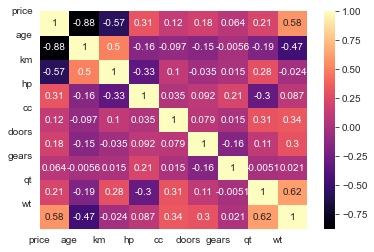

In [6]:
sns.set_style("darkgrid")
sns.heatmap(tc.corr(),annot=True,cmap='magma')
plt.xticks(range(len(tc.columns)), tc.columns);
plt.yticks(range(len(tc.columns)), tc.columns)

pd.DataFrame(tc.corr())

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='km'>

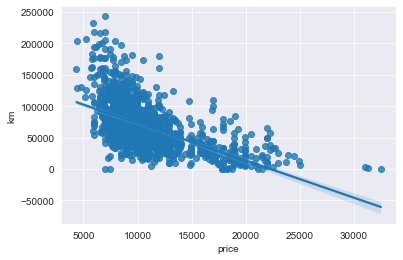

In [7]:
sns.regplot(tc.price,tc.km)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='doors'>

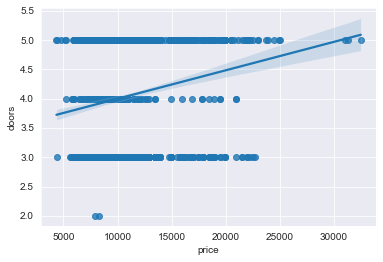

In [8]:
sns.regplot(tc.price,tc.doors)

# SCATTER PLOT BETWEEN VARIABLES ALONG WITH HISTOGRAMS

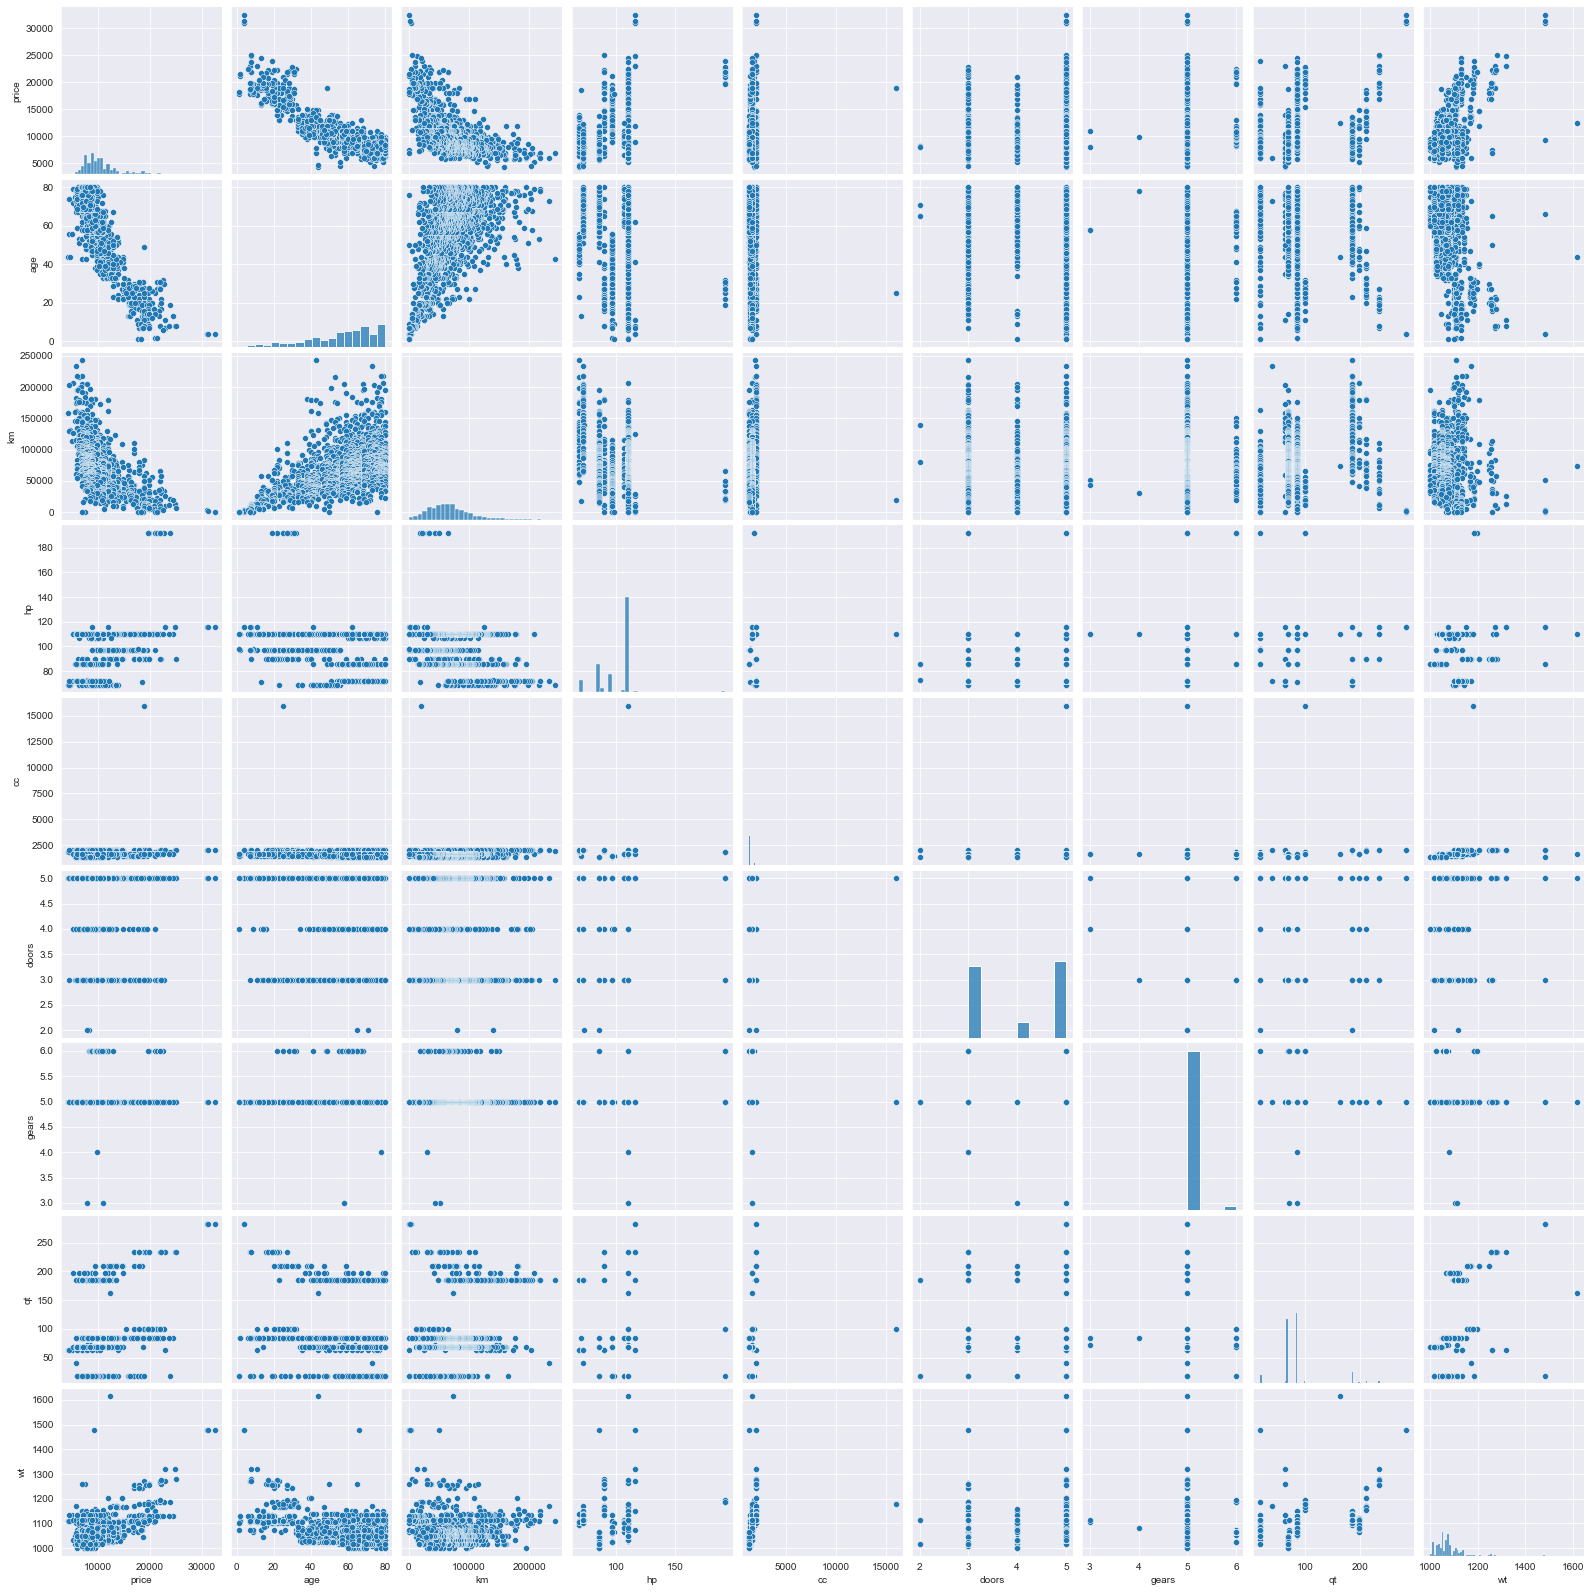

In [9]:
sns.pairplot(tc,diag_kind="hist")

# PREPARING A MLR MODEL

In [10]:
model1=smf.ols("price~age+km+hp+cc+doors+gears+qt+wt",data=tc).fit()
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:45:28   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
print("parameters of model 1 : ",model1.params)
print("   ")
print("t-values of model 1 : ", model1.tvalues )
print("   ")
print("p_values of model 1 : " , np.round(model1.pvalues,7))

parameters of model 1 :  Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
qt              3.858805
wt             16.855470
dtype: float64
   
t-values of model 1 :  Intercept    -3.875273
age         -46.551876
km          -16.552424
hp           11.209719
cc           -1.316436
doors        -0.023012
gears         3.034563
qt            2.944198
wt           15.760663
dtype: float64
   
p_values of model 1 :  Intercept    0.000111
age          0.000000
km           0.000000
hp           0.000000
cc           0.188239
doors        0.981644
gears        0.002452
qt           0.003290
wt           0.000000
dtype: float64


In [12]:
print("r-squared of model1: ",model1.rsquared)
print("   ")
print("rsquared_adj of model1 : ",model1.rsquared_adj)
#model1 shows 86.25% accuracy

r-squared of model1:  0.8625200256947
   
rsquared_adj of model1 :  0.8617487495415146


# simple linear regression models

In [13]:
#checking for linearity between  price and other independent variable 

In [14]:
sl_1=smf.ols("price~doors",data=tc).fit()
sl_1.rsquared #weak relation with dependent variable

0.03371039712338908

In [15]:
sl_2=smf.ols("price~cc",data=tc).fit()
sl_2.rsquared #weak relation with dependent variable

0.015469019620240387

In [16]:
sl_3=smf.ols("price~age",data=tc).fit()
sl_3.rsquared # strong relation with dependent variable


0.7678550373053038

In [17]:
sl_4=smf.ols("price~km",data=tc).fit()
sl_4.rsquared #weak relation with dependent variable

0.32423867438267784

In [18]:
sl_5=smf.ols("price~hp",data=tc).fit()
sl_5.rsquared #weak relation with dependent variable

0.09868025156106075

In [19]:
sl_6=smf.ols("price~gears",data=tc).fit()
sl_6.rsquared #weak relation with dependent variable

0.004074404058589276

In [20]:
sl_7=smf.ols("price~qt",data=tc).fit()
sl_7.rsquared #weak relation with dependent variable

0.044735539443015004

In [21]:
sl_8=smf.ols("price~wt",data=tc).fit()
sl_8.rsquared #weak relation with dependent variable

0.3316255770869809

# ViF

In [22]:
rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+wt',data=tc).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('km~age+hp+cc+doors+gears+qt+wt',data=tc).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('hp~km+age+cc+doors+gears+qt+wt',data=tc).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('cc~km+hp+age+doors+gears+qt+wt',data=tc).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_doors=smf.ols('doors~km+hp+cc+age+gears+qt+wt',data=tc).fit().rsquared
vif_doors=1/(1-rsq_doors)
rsq_gears=smf.ols('gears~km+hp+cc+doors+age+qt+wt',data=tc).fit().rsquared
vif_gears=1/(1-rsq_gears)
rsq_qt=smf.ols('qt~km+hp+cc+doors+gears+age+wt',data=tc).fit().rsquared
vif_qt=1/(1-rsq_qt)
rsq_wt=smf.ols('wt~km+hp+cc+doors+gears+qt+age',data=tc).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [23]:
d1={"Variables":["age","km","hp","cc","doors","gears","qt","wt"],
   "VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,qt,2.295375
7,wt,2.487180


# Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

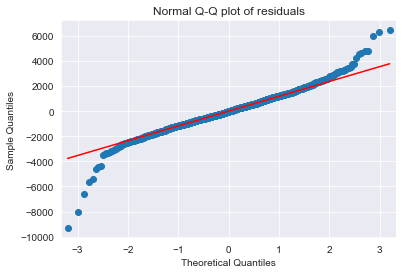

In [24]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model1.resid<-6000))

[array([220, 600, 959])]

In [26]:
list(np.where(model1.resid>6000))

[array([109, 146, 522])]

In [27]:
tc.value_counts().sum()

1435

In [28]:
tc1=tc.drop(tc.index[[220, 600, 959,109, 146, 522]]).reset_index(drop=True)

In [29]:
tc1.value_counts().sum()

1429

In [30]:
#create a model after deletion of the indexes
model2=smf.ols("price~age+km+hp+cc+doors+gears+qt+wt",data=tc1).fit()
model2.summary()
#the model accuracy has incresed 1%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:45:29   Log-Likelihood:                -12207.
No. Observations:                1429   AIC:                         2.443e+04
Df Residuals:                    1420   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04   1464.053     -8.268      0.000    -1.5e+04   -9232.708
age         -114.2571      2.512    -45.479      0.000    -119.185    -109.329
km            -0.0215      0.001    -18.419      0.000      -0.024      -0.019
hp            25.1770      2.673      9.418      0.000      19.933      30.421
cc            -0.2039      0.084     -2.421      0.016      -0.369      -0.039
doors        -74.3231     37.846     -1.964      0.050    -148.563      -0.083
gears        597.1951    182.732      3.268      0.001     238.741     955.649
qt            -1.5202      1.316     -1.155      0.248      -4.101       1.061
wt            24.1591      1.230     19.647      0.000      21.747      26.571
==============================================================================
Omnibus:                       52.022   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.015
Skew:                          -0.128   Prob(JB):                     3.55e-29
Kurtosis:                       4.461   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print("parameters of model 2 : ",model2.params)
print("   ")
print("t-values of model 2 : ", model2.tvalues )
print("   ")
print("p_values of model 2 : " , np.round(model2.pvalues,7))

parameters of model 2 :  Intercept   -12104.647118
age           -114.257147
km              -0.021529
hp              25.176994
cc              -0.203928
doors          -74.323059
gears          597.195060
qt              -1.520162
wt              24.159107
dtype: float64
   
t-values of model 2 :  Intercept    -8.267901
age         -45.479441
km          -18.418629
hp            9.418408
cc           -2.421249
doors        -1.963834
gears         3.268147
qt           -1.155465
wt           19.647303
dtype: float64
   
p_values of model 2 :  Intercept    0.000000
age          0.000000
km           0.000000
hp           0.000000
cc           0.015592
doors        0.049744
gears        0.001108
qt           0.248094
wt           0.000000
dtype: float64


In [32]:
print("r-squared of model1: ",model2.rsquared)
print("   ")
print("rsquared_adj of model1 : ",model2.rsquared_adj)
#model2 shows 87.7% accuracy

r-squared of model1:  0.8773162736730492
   
rsquared_adj of model1 :  0.8766250977500805


# residual plot for homoskedacity

In [33]:
def standard_values (vals): return (vals/vals.mean())/vals.std()

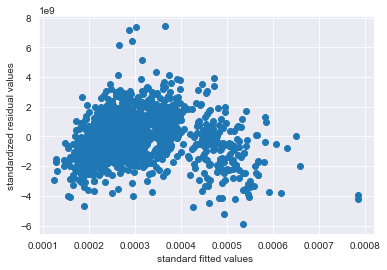

In [34]:
#plloting for the developed model (model2)
plt.scatter(standard_values(model2.fittedvalues),standard_values(model2.resid))
plt.xlabel("standard fitted values ")
plt.ylabel("standardized residual values")
plt.show()

# residual vs regressors

eval_env: 1


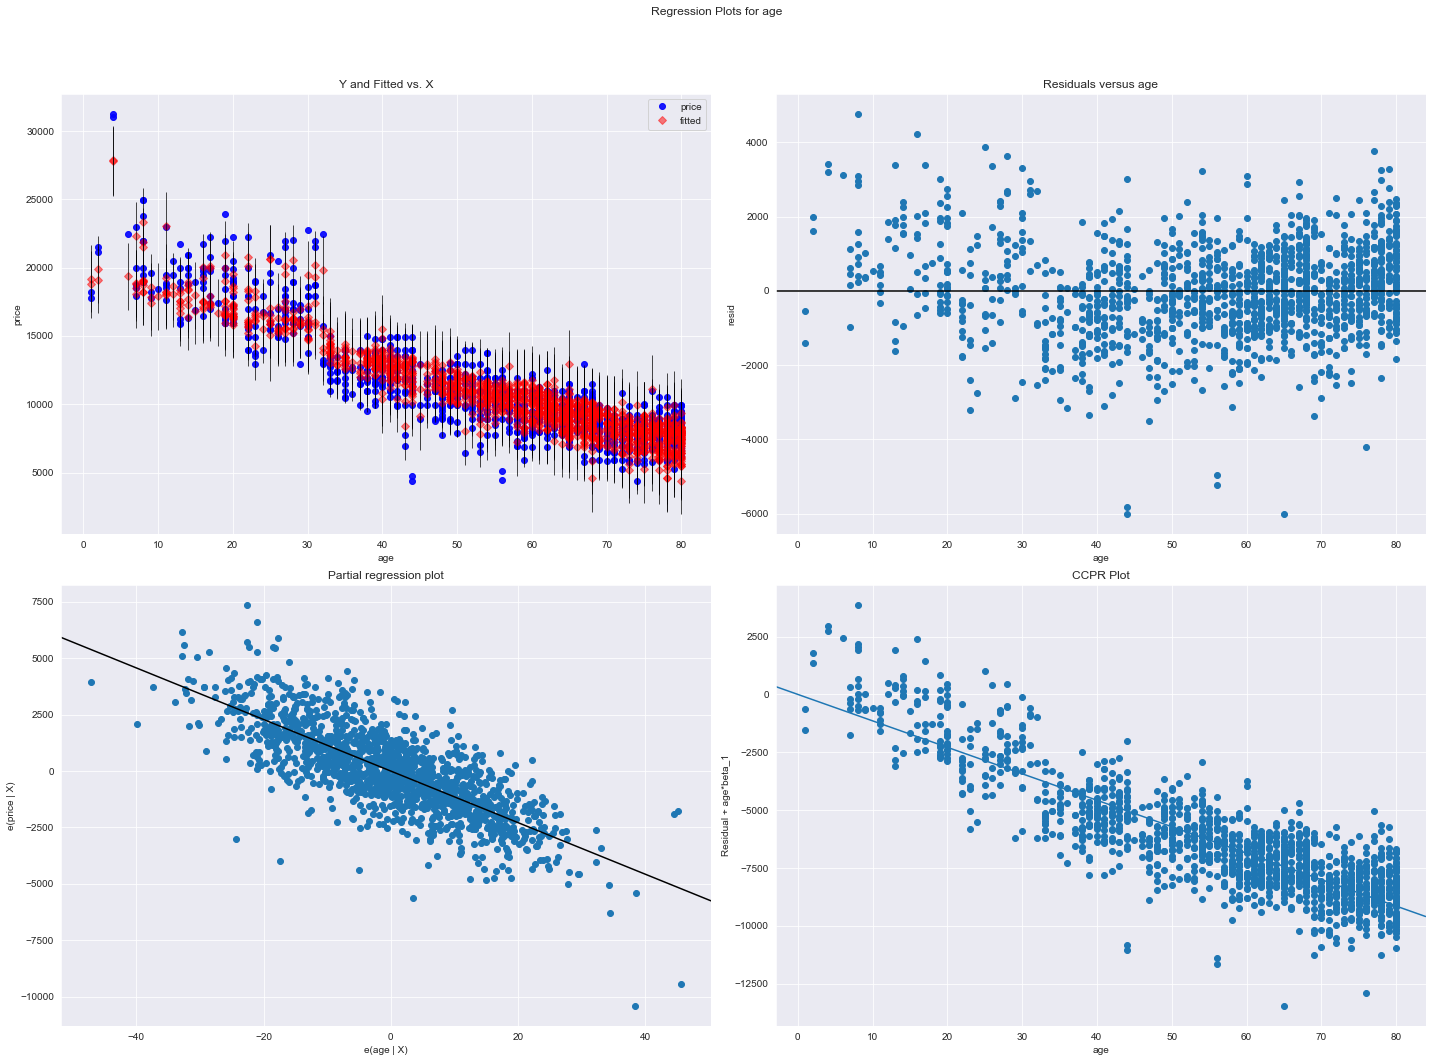

In [35]:
fig=plt.figure(figsize=[20,15])
sm.graphics.plot_regress_exog(model2,'age',fig=fig)
plt.show()

eval_env: 1


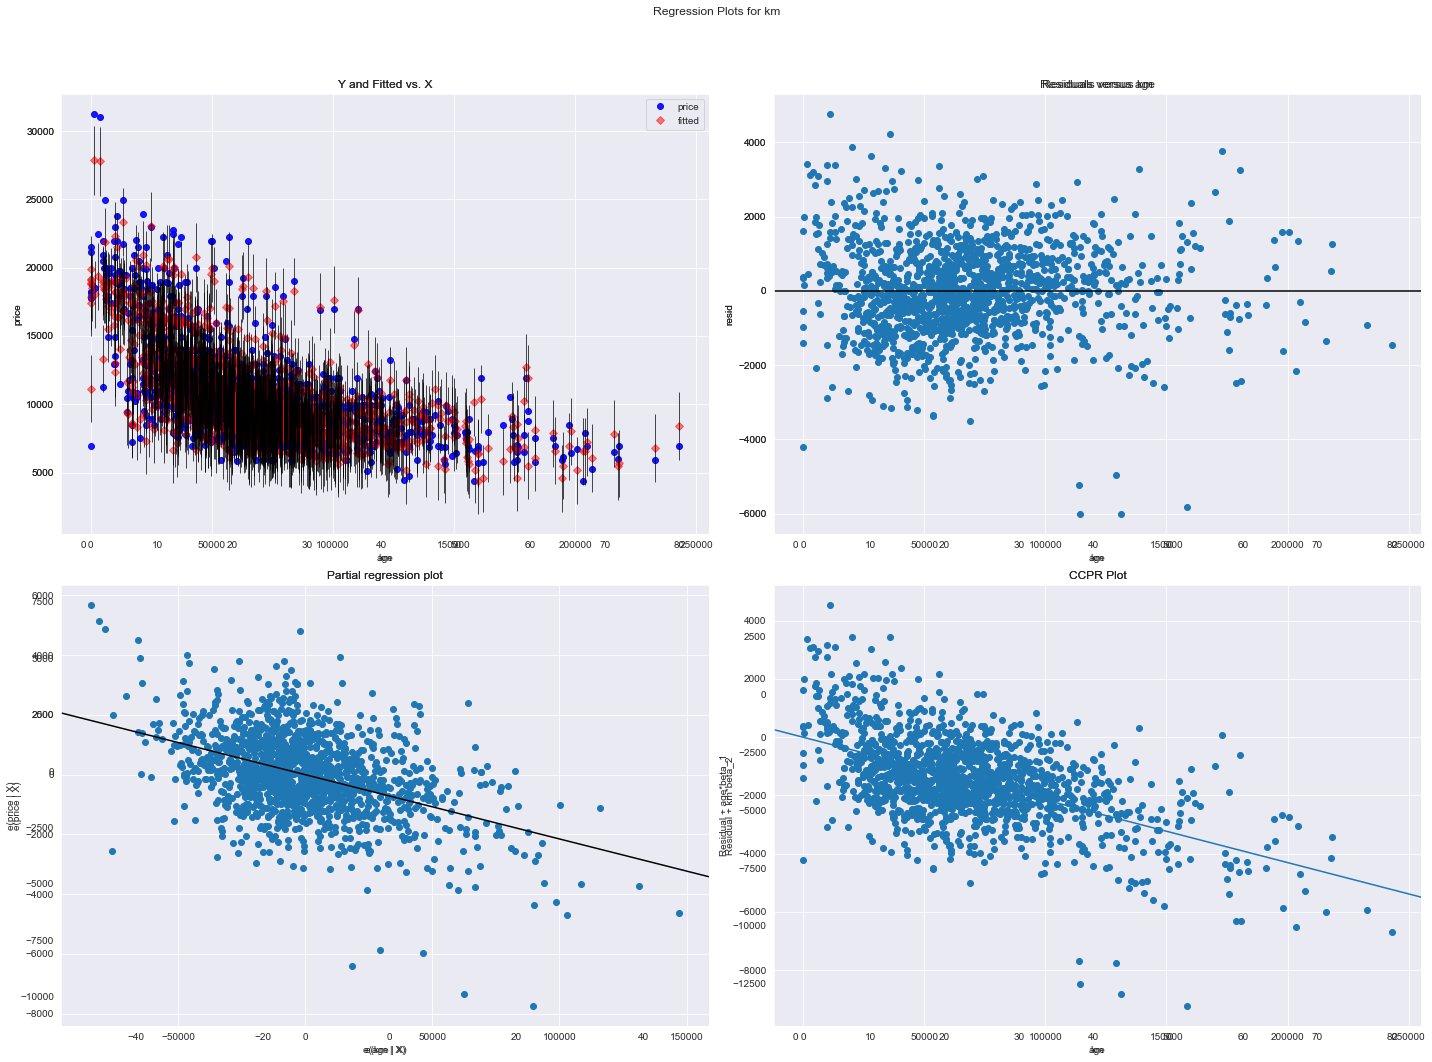

In [36]:
sm.graphics.plot_regress_exog(model2,'km',fig=fig)

eval_env: 1


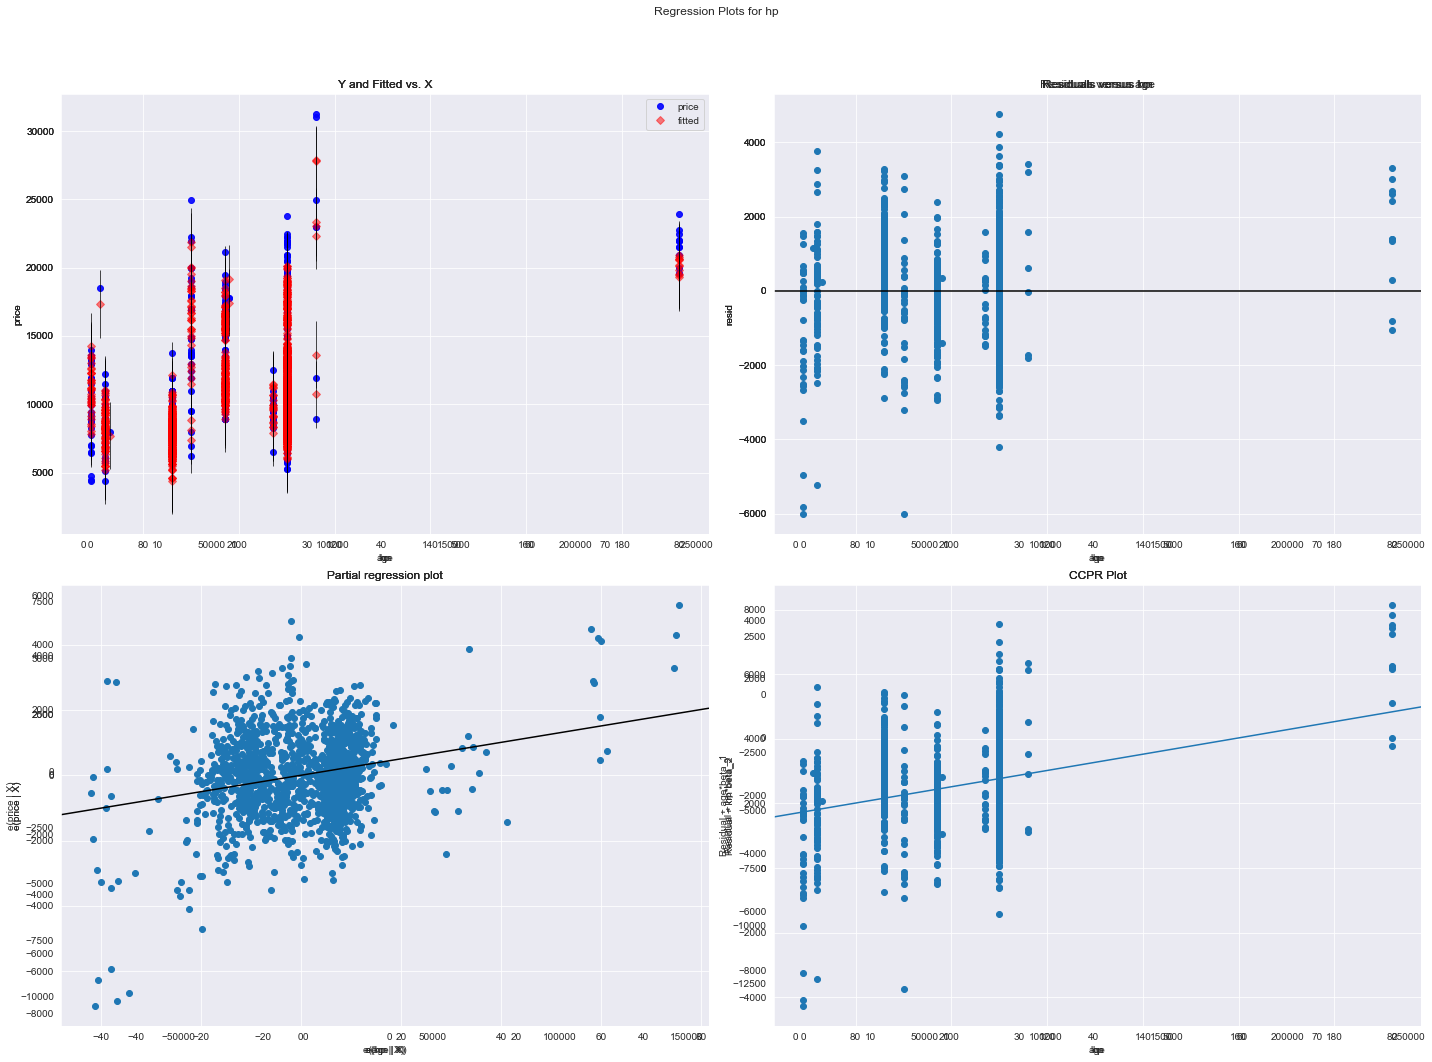

In [37]:
sm.graphics.plot_regress_exog(model2,'hp',fig=fig)

eval_env: 1


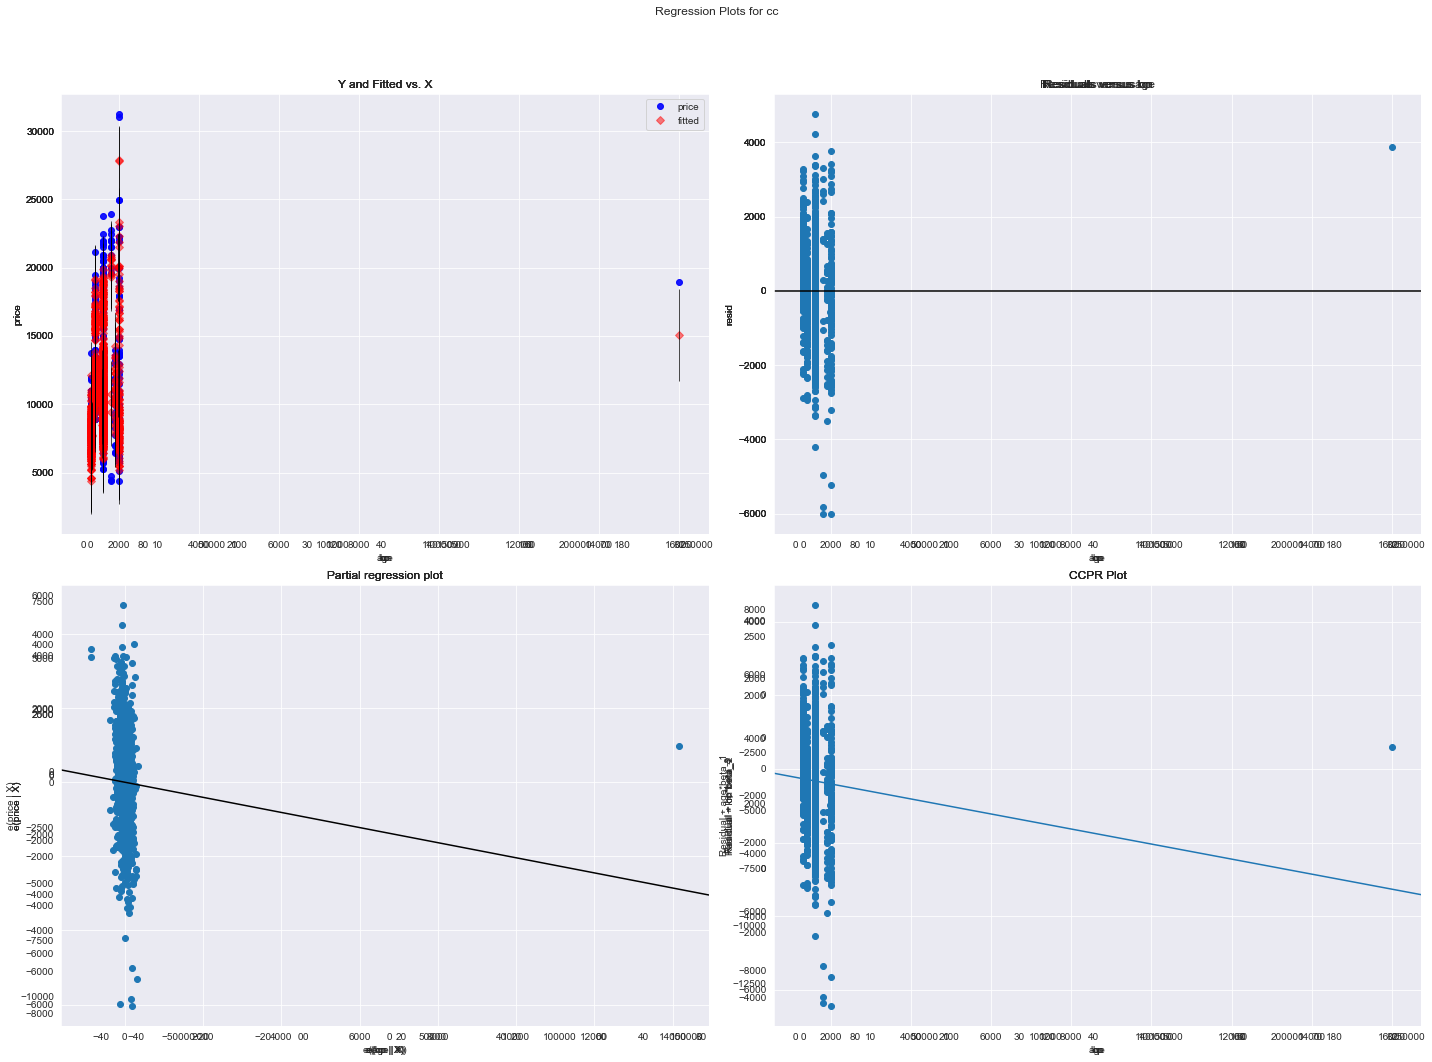

In [38]:
sm.graphics.plot_regress_exog(model2,'cc',fig=fig)

eval_env: 1


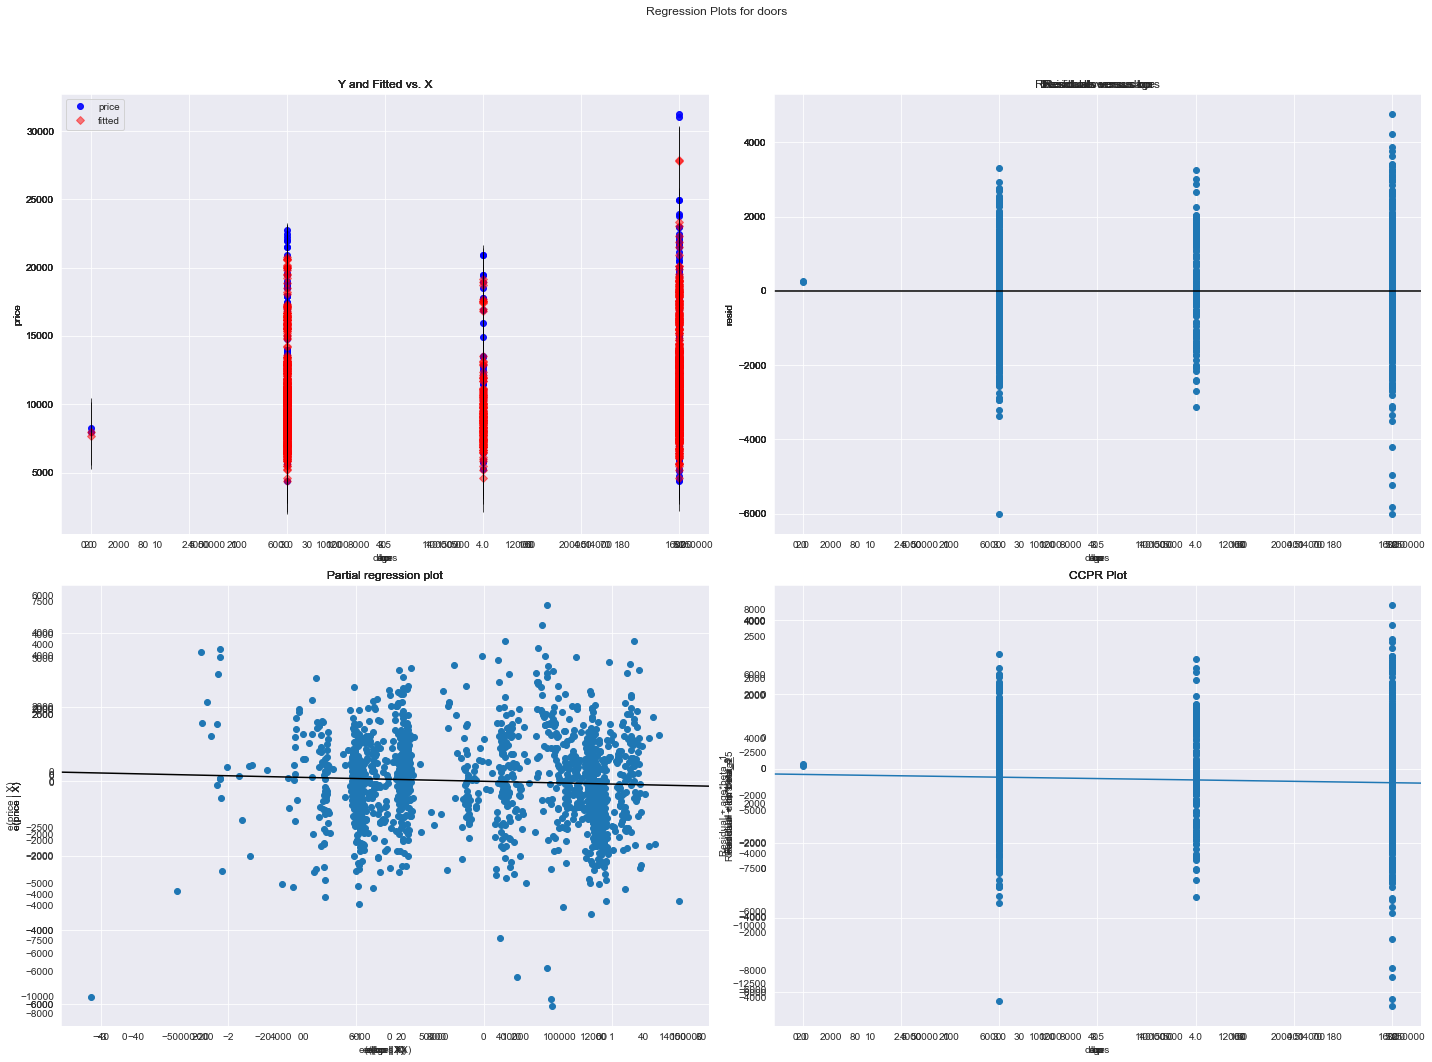

In [39]:
sm.graphics.plot_regress_exog(model2,'doors',fig=fig)

eval_env: 1


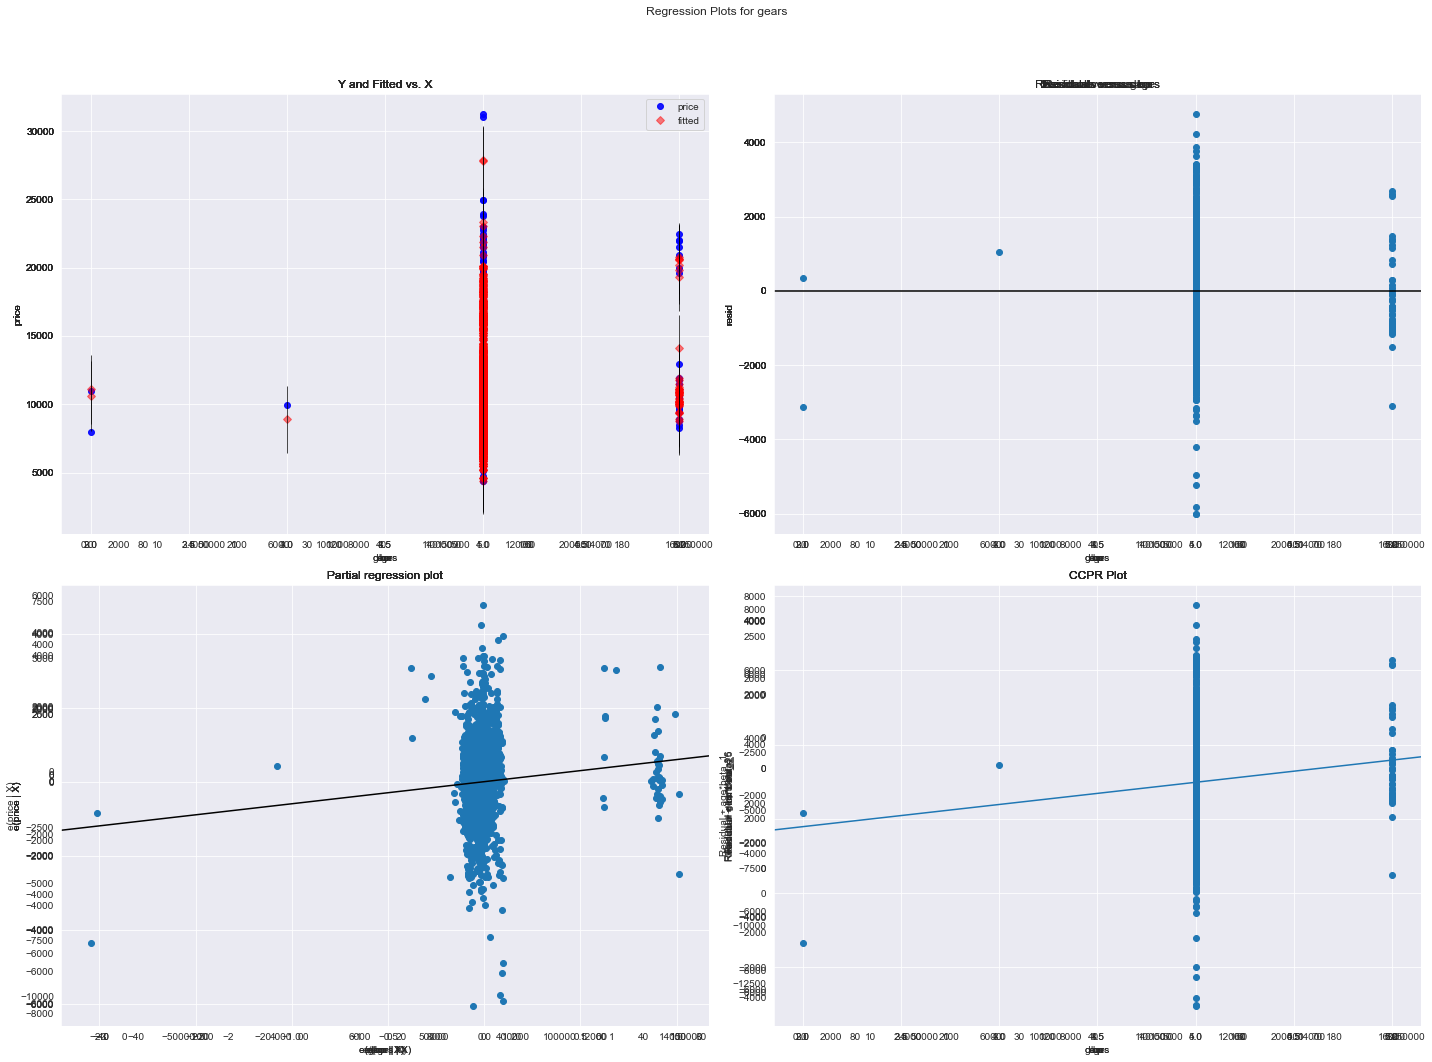

In [40]:
sm.graphics.plot_regress_exog(model2,'gears',fig=fig)

eval_env: 1


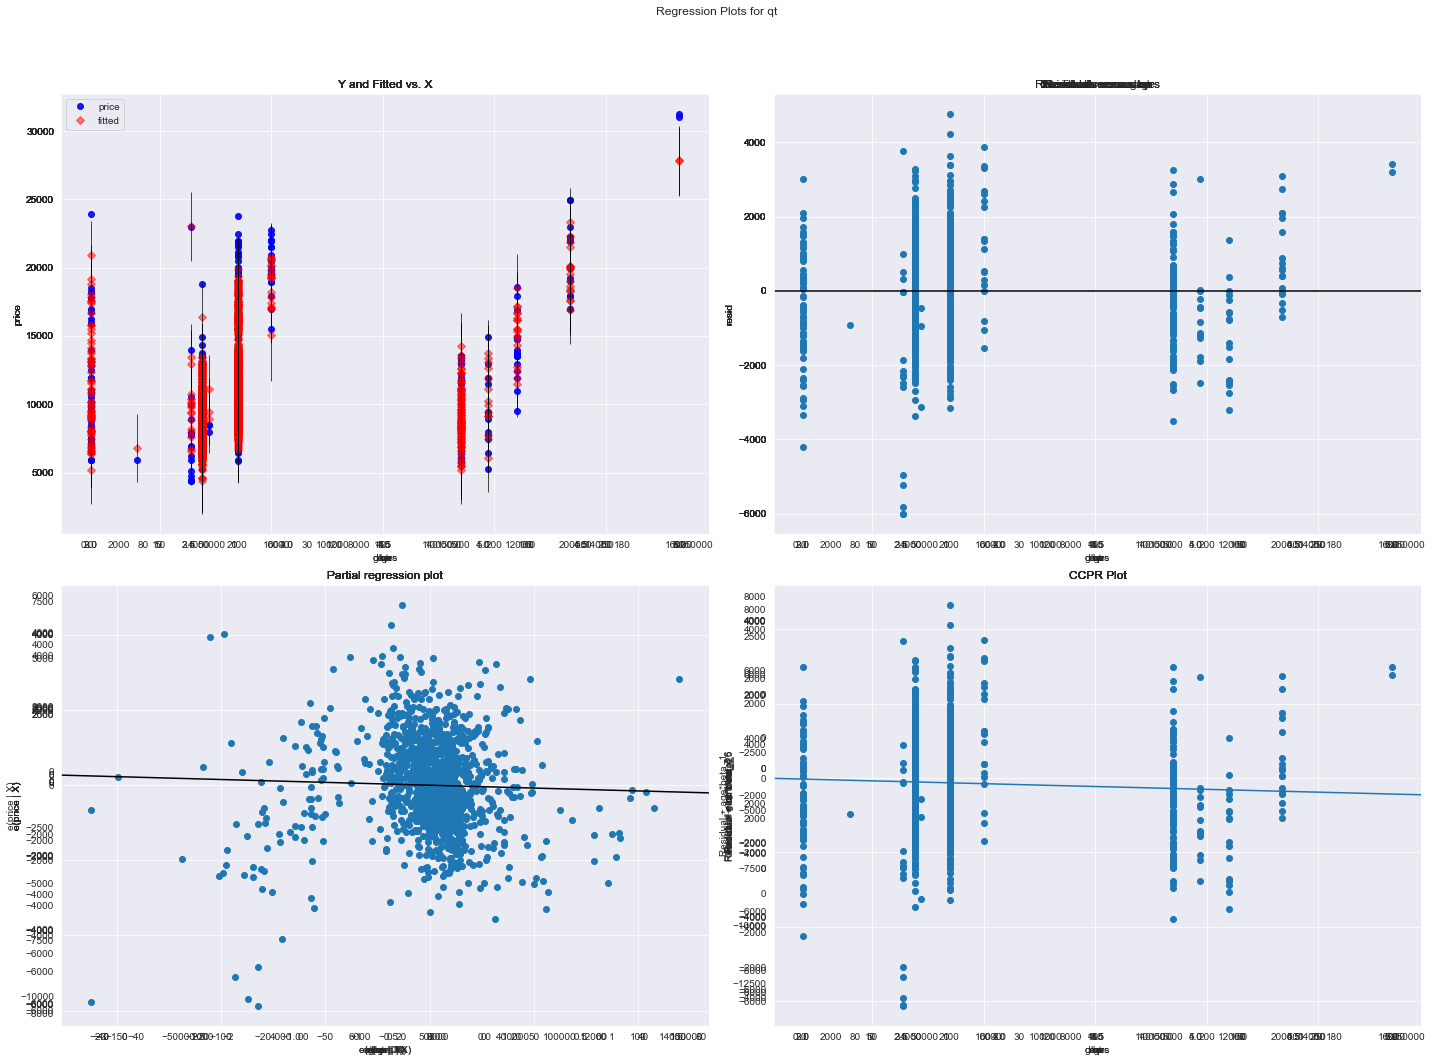

In [41]:
sm.graphics.plot_regress_exog(model2,'qt',fig=fig)

eval_env: 1


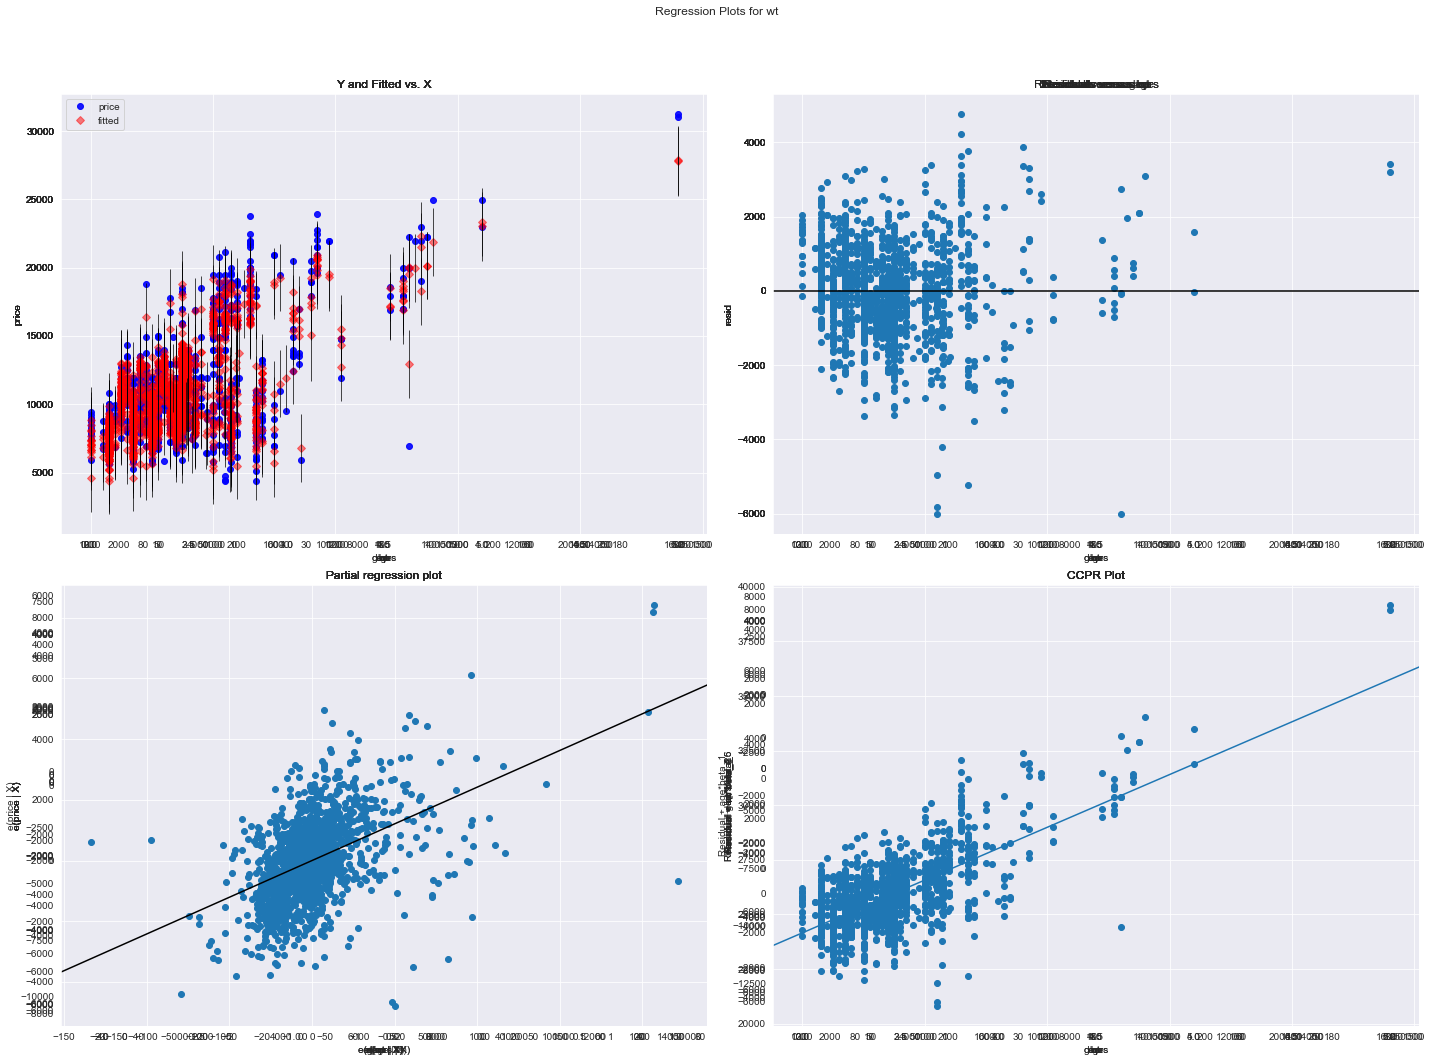

In [42]:
sm.graphics.plot_regress_exog(model2,'wt',fig=fig)

# cooks distance 


In [43]:
#looking for further  influences from model2
model_influ=model2.get_influence()
(c,_)=model_influ.cooks_distance


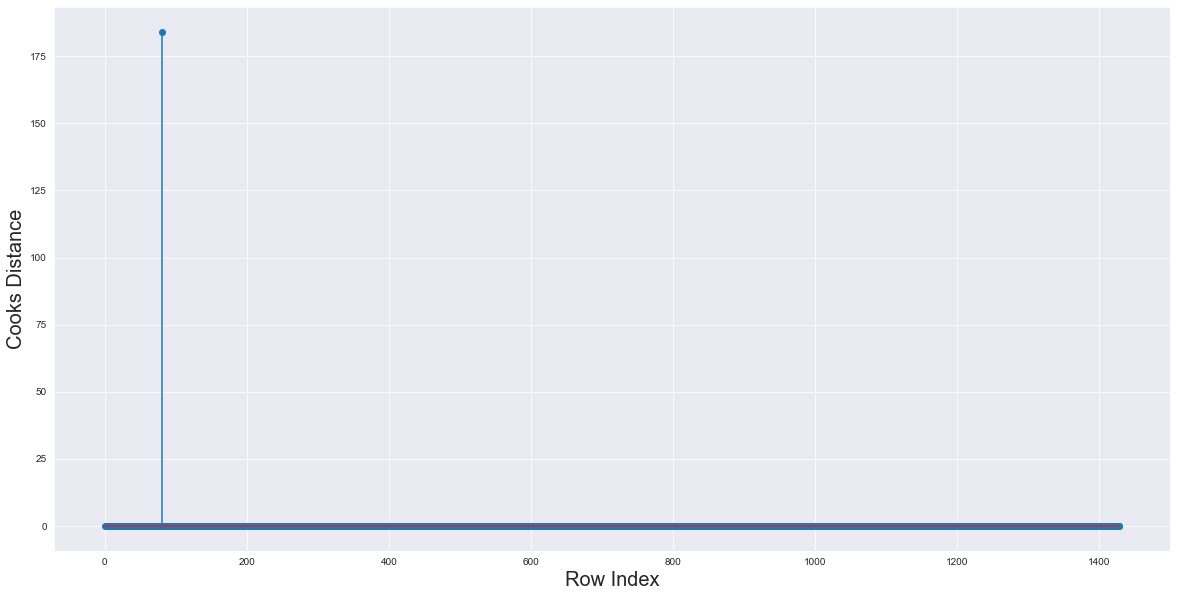

In [44]:
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(tc1)),np.round(c,3))
plt.xlabel('Row Index',fontsize=20)
plt.ylabel('Cooks Distance',fontsize=20)
plt.show()

In [45]:
np.argmax(c),np.max(c)

(80, 184.05548354693548)

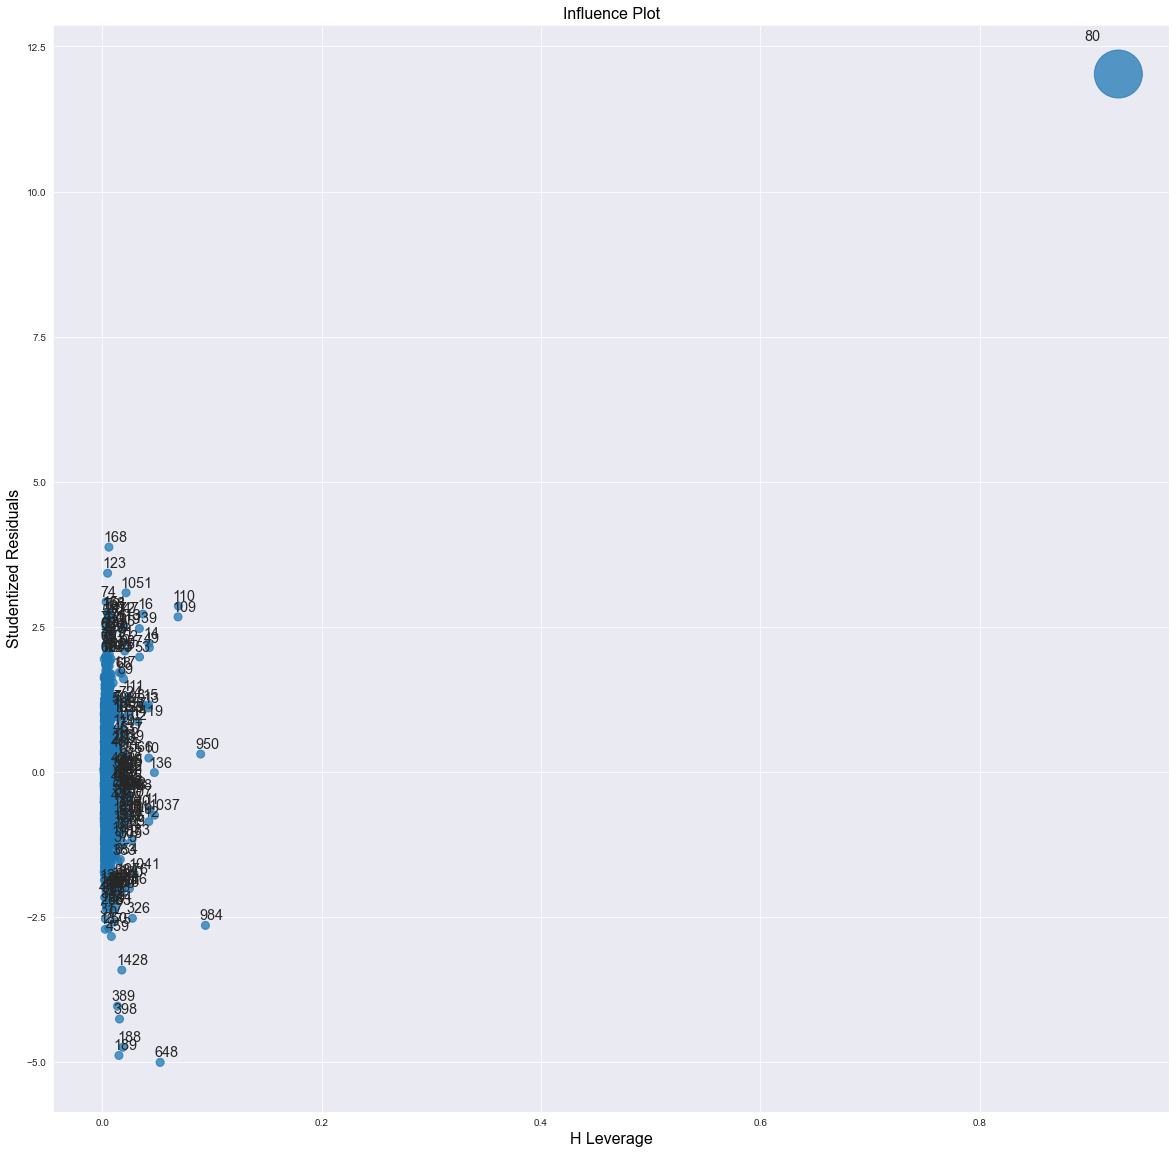

In [46]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model2,ax = ax)

In [47]:
k=tc1.shape[1]
n=tc1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02099370188943317

In [48]:
tc1[tc1.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qt,wt
80,18950,25,20019,110,16000,5,5,100,1180


In [49]:
tc2=tc1.drop(tc1.index[[80]],axis=0).reset_index(drop=True)
tc2

,price,age,km,hp,cc,doors,gears,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1423,7500,69,20544,86,1300,3,5,69,1025
1424,10845,72,19000,86,1300,3,5,69,1015
1425,8500,71,17016,86,1300,3,5,69,1015
1426,7250,70,16916,86,1300,3,5,69,1015


In [50]:
tc2.value_counts().sum()

1428

In [51]:
model3=smf.ols("price~age+km+hp+cc+doors+gears+qt+wt",data=tc2).fit()
model3.summary()
#the accuracy a has increased by 1 percent

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1410.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:45:43   Log-Likelihood:                -12130.
No. Observations:                1428   AIC:                         2.428e+04
Df Residuals:                    1419   BIC:                         2.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.529e+04   1420.135    -10.767      0.000   -1.81e+04   -1.25e+04
age         -110.4694      2.415    -45.747      0.000    -115.206    -105.732
km            -0.0176      0.001    -15.177      0.000      -0.020      -0.015
hp            34.5657      2.664     12.973      0.000      29.339      39.792
cc            -3.6194      0.295    -12.263      0.000      -4.198      -3.040
doors       -131.6843     36.380     -3.620      0.000    -203.049     -60.320
gears        487.0311    174.379      2.793      0.005     144.962     829.100
qt             4.2733      1.343      3.182      0.001       1.639       6.908
wt            31.0485      1.304     23.804      0.000      28.490      33.607
==============================================================================
Omnibus:                       44.290   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.263
Skew:                          -0.016   Prob(JB):                     6.91e-25
Kurtosis:                       4.367   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
(c,_)=model3.get_influence().cooks_distance

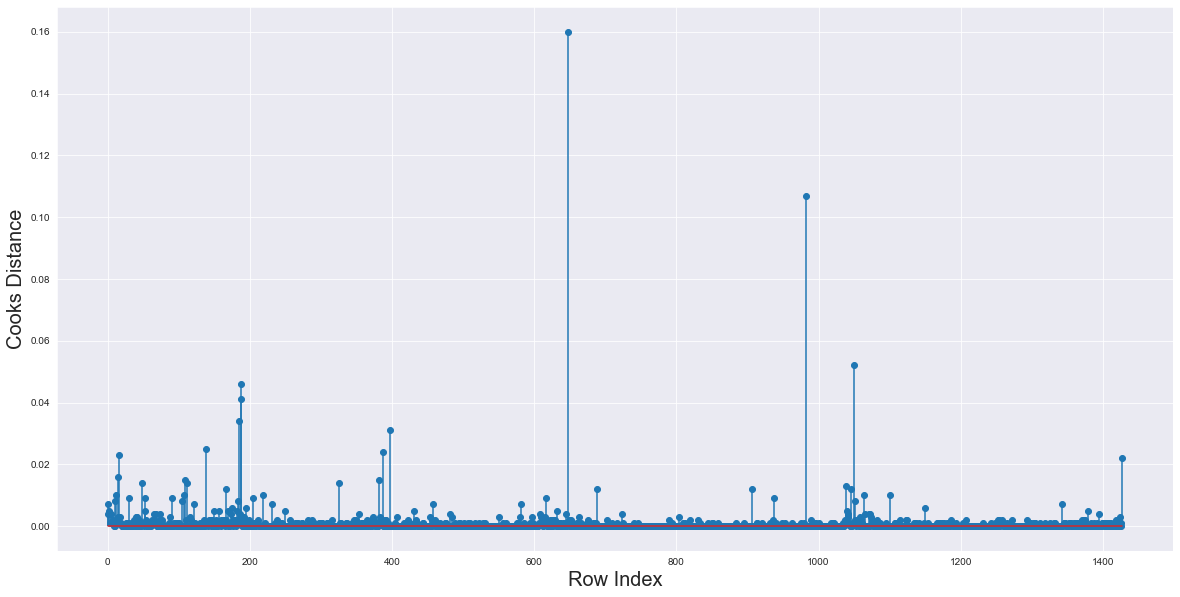

In [53]:
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(tc2)),np.round(c,3))
plt.xlabel('Row Index',fontsize=20)
plt.ylabel('Cooks Distance',fontsize=20)
plt.show()

In [54]:
np.argmax(c)

647

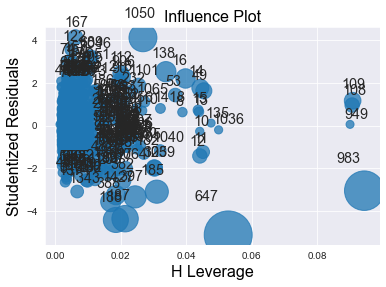

In [55]:
influence_plot(model3)
plt.show()

In [56]:
#droping influnecing data from tc2
tc3=tc2.drop(tc2.index[[958,219,647]],axis=0).reset_index(drop=True)

In [57]:
tc3.value_counts().sum()

1425

In [58]:
model4=smf.ols("price~age+km+hp+cc+doors+gears+qt+wt",data=tc3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1435.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:45:45   Log-Likelihood:                -12092.
No. Observations:                1425   AIC:                         2.420e+04
Df Residuals:                    1416   BIC:                         2.425e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.642e+04   1426.971    -11.508      0.000   -1.92e+04   -1.36e+04
age         -109.5777      2.405    -45.568      0.000    -114.295    -104.861
km            -0.0175      0.001    -15.203      0.000      -0.020      -0.015
hp            33.3705      2.654     12.576      0.000      28.165      38.576
cc            -3.6075      0.293    -12.317      0.000      -4.182      -3.033
doors       -148.5441     36.259     -4.097      0.000    -219.671     -77.418
gears        479.6353    172.954      2.773      0.006     140.362     818.908
qt             3.1246      1.351      2.313      0.021       0.475       5.775
wt            32.3433      1.320     24.502      0.000      29.754      34.933
==============================================================================
Omnibus:                       34.657   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.479
Skew:                           0.040   Prob(JB):                     4.07e-17
Kurtosis:                       4.125   Cond. No.                     3.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
model4.rsquared,model3.rsquared

(0.8901855775997988, 0.8882370658520005)

<StemContainer object of 3 artists>

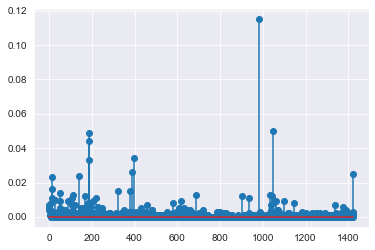

In [60]:
(c,_)=model4.get_influence().cooks_distance
plt.stem(np.arange(len(tc3)),np.round(c,3))
         

In [61]:
np.argmax(c)

980

In [62]:
tc4=tc3.drop(tc3.index[[980]],axis=0).reset_index(drop=True)
tc4.value_counts().sum()

1424

In [63]:
model5=smf.ols("price~age+km+hp+cc+doors+gears+qt+wt",data=tc4).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1444.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:45:45   Log-Likelihood:                -12079.
No. Observations:                1424   AIC:                         2.418e+04
Df Residuals:                    1415   BIC:                         2.422e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.583e+04   1434.747    -11.035      0.000   -1.86e+04    -1.3e+04
age         -109.3106      2.399    -45.572      0.000    -114.016    -104.605
km            -0.0175      0.001    -15.234      0.000      -0.020      -0.015
hp            33.9327      2.651     12.799      0.000      28.732      39.134
cc            -3.6299      0.292    -12.429      0.000      -4.203      -3.057
doors       -157.6614     36.260     -4.348      0.000    -228.791     -86.532
gears        307.5915    180.836      1.701      0.089     -47.144     662.327
qt             3.0659      1.347      2.277      0.023       0.424       5.708
wt            32.6055      1.318     24.730      0.000      30.019      35.192
==============================================================================
Omnibus:                       34.723   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.032
Skew:                           0.054   Prob(JB):                     5.09e-17
Kurtosis:                       4.119   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
 print("parameters of model 5 : ",model5.params)
print("   ")
print("t-values of model 5 : ", model5.tvalues )
print("   ")
print("p_values of model 5 : " , np.round(model5.pvalues,7))

parameters of model 5 :  Intercept   -15831.908164
age           -109.310604
km              -0.017491
hp              33.932748
cc              -3.629918
doors         -157.661442
gears          307.591503
qt               3.065947
wt              32.605487
dtype: float64
   
t-values of model 5 :  Intercept   -11.034636
age         -45.571848
km          -15.234056
hp           12.798707
cc          -12.428648
doors        -4.348062
gears         1.700941
qt            2.276506
wt           24.729674
dtype: float64
   
p_values of model 5 :  Intercept    0.000000
age          0.000000
km           0.000000
hp           0.000000
cc           0.000000
doors        0.000015
gears        0.089174
qt           0.022965
wt           0.000000
dtype: float64


In [65]:
model5.rsquared,model4.rsquared
#model5 show slight increase in accuracy
#deletion of further influencing indexes might cause the model to fail

(0.8909060500199171, 0.8901855775997988)

In [66]:
tc4

,price,age,km,hp,cc,doors,gears,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1419,7500,69,20544,86,1300,3,5,69,1025
1420,10845,72,19000,86,1300,3,5,69,1015
1421,8500,71,17016,86,1300,3,5,69,1015
1422,7250,70,16916,86,1300,3,5,69,1015


# Predicting for new data


In [67]:
new_data=pd.DataFrame({"age":23,"km":46986,"hp":90,"cc":4,"doors":3,"gears":5,"qt":200,"wt":1165},index=[1])
new_data

,age,km,hp,cc,doors,gears,qt,wt
1,23,46986,90,4,3,5,200,1165


In [68]:
model5.predict(new_data)

1    23535.101078
dtype: float64

In [69]:
model5.predict(tc4)

0       16320.444525
1       15866.537319
2       16303.398594
3       15974.776908
4       15866.725791
            ...     
1419     9162.796835
1420     8535.816159
1421     8679.828774
1422     8790.888471
1423    10915.617496
Length: 1424, dtype: float64

In [70]:
pred=model5.predict(tc4)

In [71]:
pred=pd.DataFrame(pred)
pred.columns=["prediction"]
pred

,prediction
0,16320.444525
1,15866.537319
2,16303.398594
3,15974.776908
4,15866.725791
...,...
1419,9162.796835
1420,8535.816159
1421,8679.828774
1422,8790.888471


In [72]:
price=pd.DataFrame(tc4["price"])
price = price.reset_index(drop=True)

In [73]:
price_pred=pd.concat([pred,price],axis=1)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='prediction'>

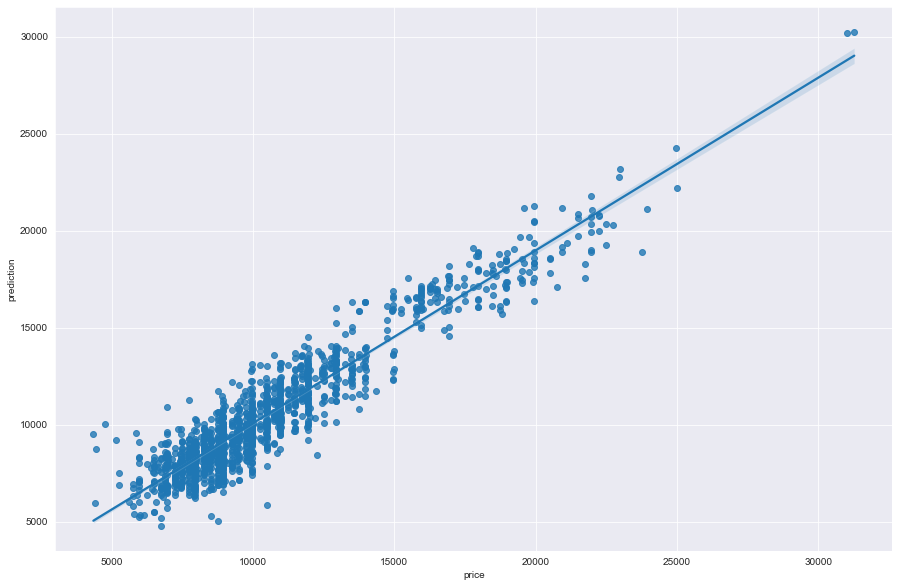

In [74]:
plt.figure(figsize=[15,10])
sns.regplot(price_pred["price"],price_pred["prediction"])

# ------------------------------------------------------------------------

# *50 STARTUP

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [75]:
ls

23.08.2022 assignment.ipynb         PCA  ASSIGNMENT.ipynb
50_Startups.csv                     SLR ASSIGNMENT.ipynb
ASSOCIATION RULES ASSIGNMENT.ipynb  Toyota Corolla.txt
CLUSTERING ASSIGNMENT.ipynb         ToyotaCorolla.csv
LOGISTIC REGRESSION.ipynb           Untitled.ipynb
MLR ASSIGNMENT.ipynb                proble_statement(50_startups).txt
MULTI LINEAR REGRESSION.ipynb


In [76]:
SU=pd.read_csv("50_Startups.csv")
SU=SU.rename({"R&D Spend":"rds","Administration":"admin","Marketing Spend":"mspend","State":"state","Profit":"profit"},axis=1)
SU.tail(10)

,rds,admin,mspend,state,profit
40,28754.33,118546.05,172795.67,California,78239.91
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# CORELATION PLOT

CORELATION BETWEEN THE VARIABLES :               rds     admin    mspend    profit
rds     1.000000  0.241955  0.724248  0.972900
admin   0.241955  1.000000 -0.032154  0.200717
mspend  0.724248 -0.032154  1.000000  0.747766
profit  0.972900  0.200717  0.747766  1.000000


<AxesSubplot:>

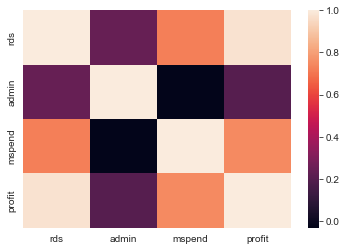

In [77]:
print("CORELATION BETWEEN THE VARIABLES : " , SU.corr())

sns.heatmap(SU.corr())

# SCATTER PLOT ALONG WITH HISTOGRAM OF VARIABLES

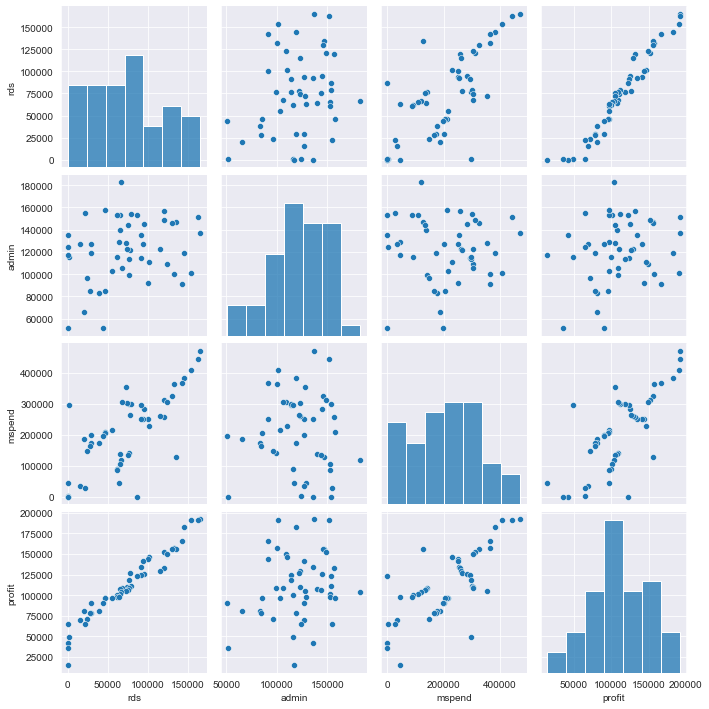

In [78]:
sns.pairplot(SU)

# MODEL CREATION

In [79]:
model1=smf.ols("profit~admin+rds+mspend",data=SU).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        00:45:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
rds            0.8057      0.045     17.846      0.000       0.715       0.897
mspend         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
print("model1 parameters : ",model1.params)
print("model1 rsquare : ",model1.rsquared)
print("model1 t-values : ",model1.tvalues)
print("model1 p-values : ",model1.pvalues)

model1 parameters :  Intercept    50122.192990
admin           -0.026816
rds              0.805715
mspend           0.027228
dtype: float64
model1 rsquare :  0.9507459940683246
model1 t-values :  Intercept     7.626218
admin        -0.525507
rds          17.846374
mspend        1.655077
dtype: float64
model1 p-values :  Intercept    1.057379e-09
admin        6.017551e-01
rds          2.634968e-22
mspend       1.047168e-01
dtype: float64


# simple linear regression with independent variables 

In [81]:
slr_1=smf.ols("profit~rds",data=SU).fit()
print("rsquared of slr_1: ",  slr_1.rsquared)
print("tvalues slr_1:",slr_1.tvalues)
print("pvalues slr_1:",slr_1.pvalues)

rsquared of slr_1:  0.9465353160804393
tvalues slr_1: Intercept    19.320288
rds          29.151139
dtype: float64
pvalues slr_1: Intercept    2.782697e-24
rds          3.500322e-32
dtype: float64


In [82]:
slr_2=smf.ols("profit~admin",data=SU).fit()
print("rsquared of slr_1: ",  slr_2.rsquared)
print("tvalues slr_1:",slr_2.tvalues)
print("pvalues slr_1:",slr_2.pvalues) # admin expense have low level of relation with price

rsquared of slr_1:  0.04028714077757223
tvalues slr_1: Intercept    3.040044
admin        1.419493
dtype: float64
pvalues slr_1: Intercept    0.003824
admin        0.162217
dtype: float64


In [83]:
slr_3=smf.ols("profit~mspend",data=SU).fit()
print("rsquared of slr_1: ",  slr_3.rsquared)
print("tvalues slr_1:",slr_3.tvalues)
print("pvalues slr_1:",slr_3.pvalues) #marketing expenditure have a moderate relation with profit 

rsquared of slr_1:  0.5591535746115515
tvalues slr_1: Intercept    7.808356
mspend       7.802657
dtype: float64
pvalues slr_1: Intercept    4.294735e-10
mspend       4.381073e-10
dtype: float64


In [84]:
#creating a multi linear regression with the 2 variables whitch have high level of relation
#with profit
mlr_1=slr_3=smf.ols("profit~rds+mspend",data=SU).fit()
mlr_1.summary()  
# there is 00.1% of diffrence from the first model of mlr (including admin)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.16e-31
Time:                        00:45:48   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rds            0.7966      0.041     19.266      0.000       0.713       0.880
mspend         0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# residual plot

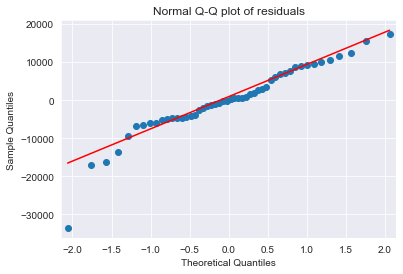

In [85]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [86]:
list(np.where((model1.resid<-20000)))

[array([49])]

# cooks distance

Text(0, 0.5, 'cooks distance')

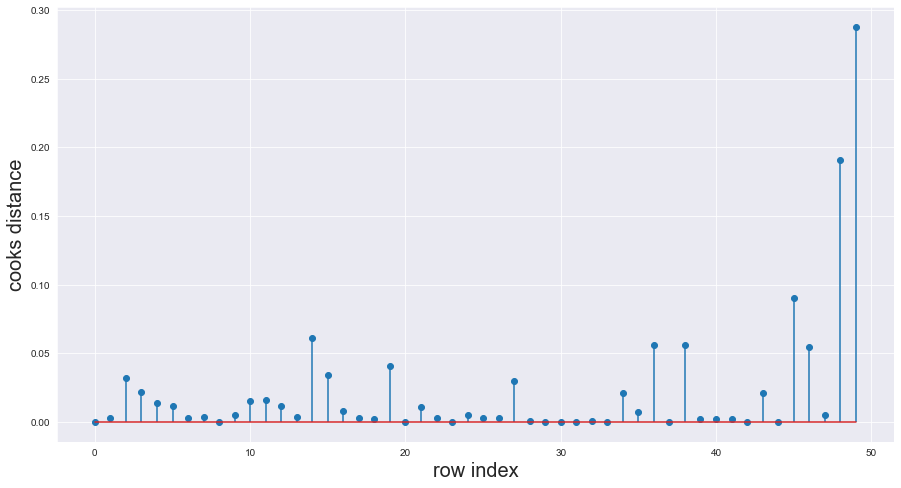

In [87]:
(c,_)=model1.get_influence().cooks_distance
plt.figure(figsize=[15,8])
plt.stem(np.arange(len(SU)),np.round(c,3))
plt.xlabel("row index",fontsize=20)
plt.ylabel("cooks distance",fontsize=20)


In [88]:
np.argmax(c),np.max(c)

(49, 0.28808229275432656)

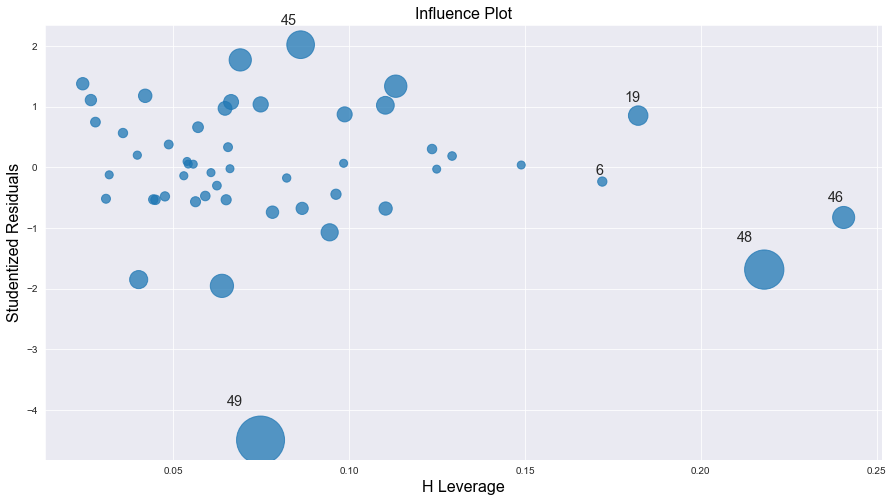

In [89]:
fig,ax=plt.subplots(figsize=[15,8])
influence_plot(model1,ax=ax)
plt.show()

In [90]:
SU[SU.index.isin([49])]

,rds,admin,mspend,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [91]:
SU1=SU.drop(SU.index[[49]],axis=0).reset_index(drop=True)
SU2=SU1.drop(SU1.index[[48]],axis=0).reset_index(drop=True)
SU2

,rds,admin,mspend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# model development

In [92]:
model2=smf.ols("profit~admin+rds+mspend",data=SU2).fit()
model2.summary()
#the transformed model shows 1.3% increase in accuracy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.03e-31
Time:                        00:45:48   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
rds            0.7895      0.036     21.718      0.000       0.716       0.863
mspend         0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


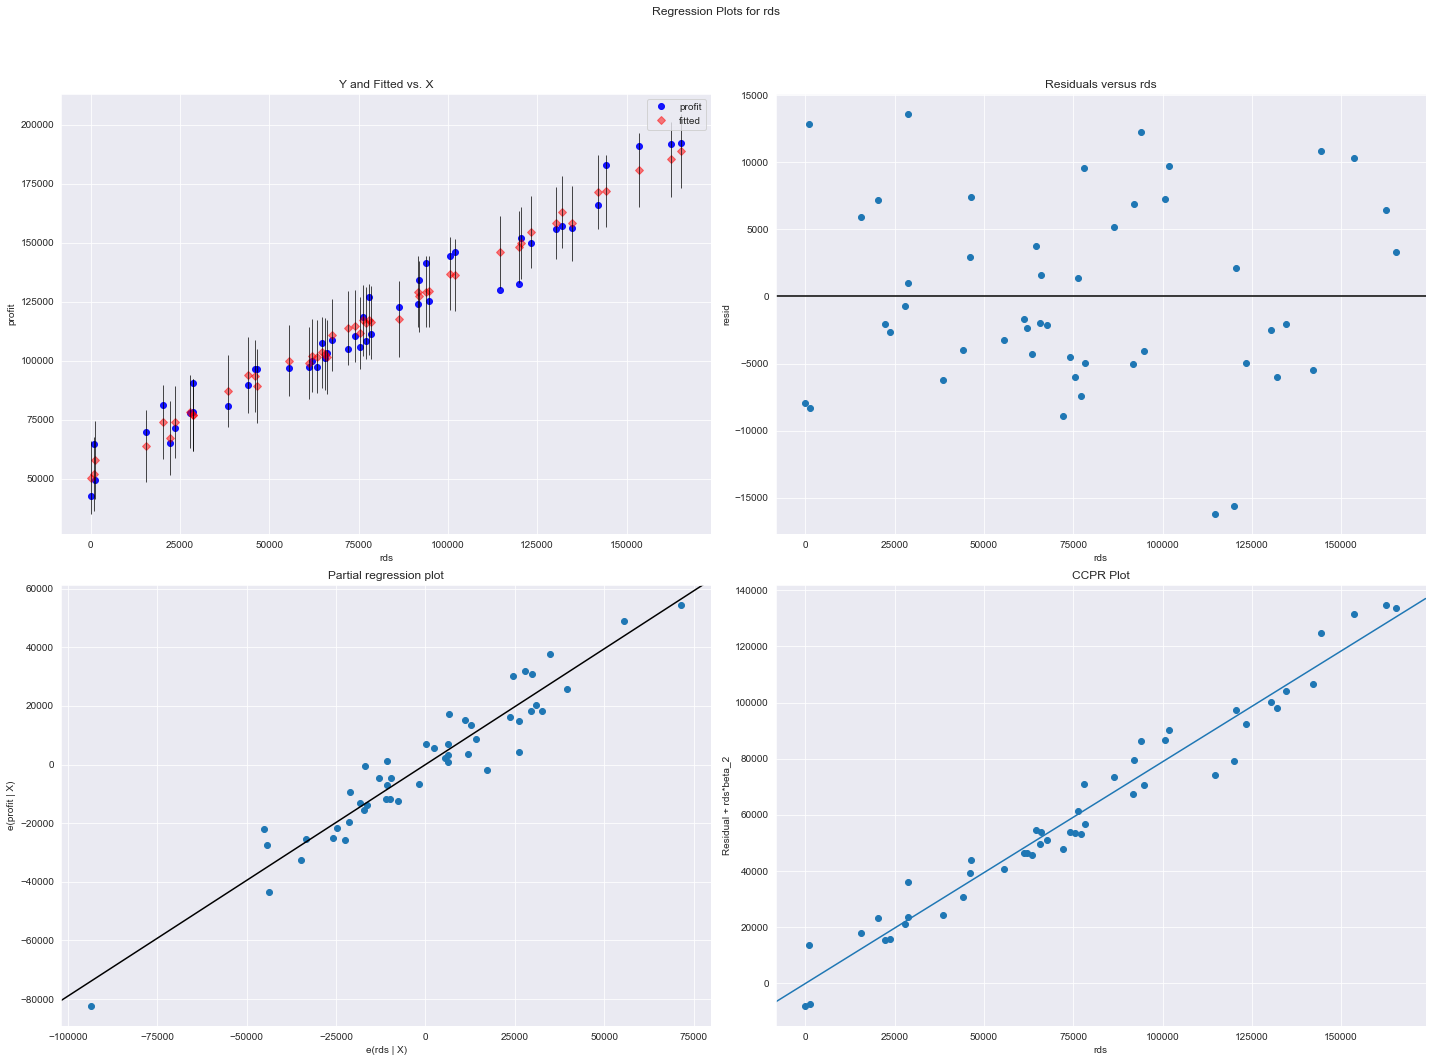

In [93]:
fig=plt.figure(figsize=[20,15])
sm.graphics.plot_regress_exog(model2,'rds',fig=fig)
plt.show()

eval_env: 1


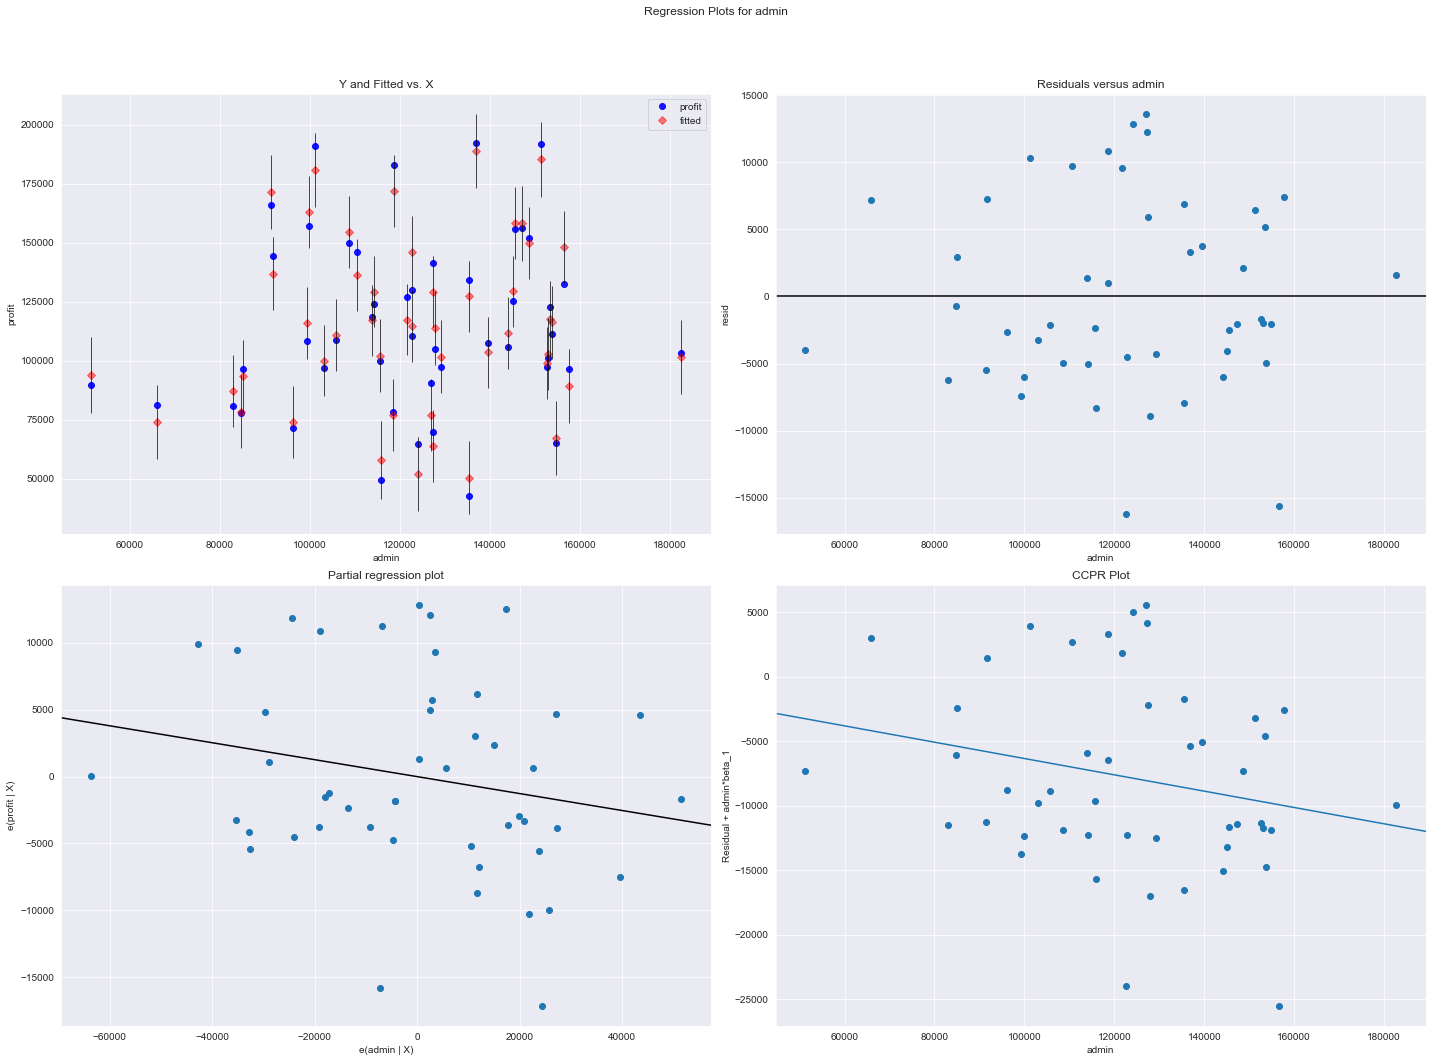

In [94]:
fig=plt.figure(figsize=[20,15])
sm.graphics.plot_regress_exog(model2,'admin',fig=fig)
plt.show()

eval_env: 1


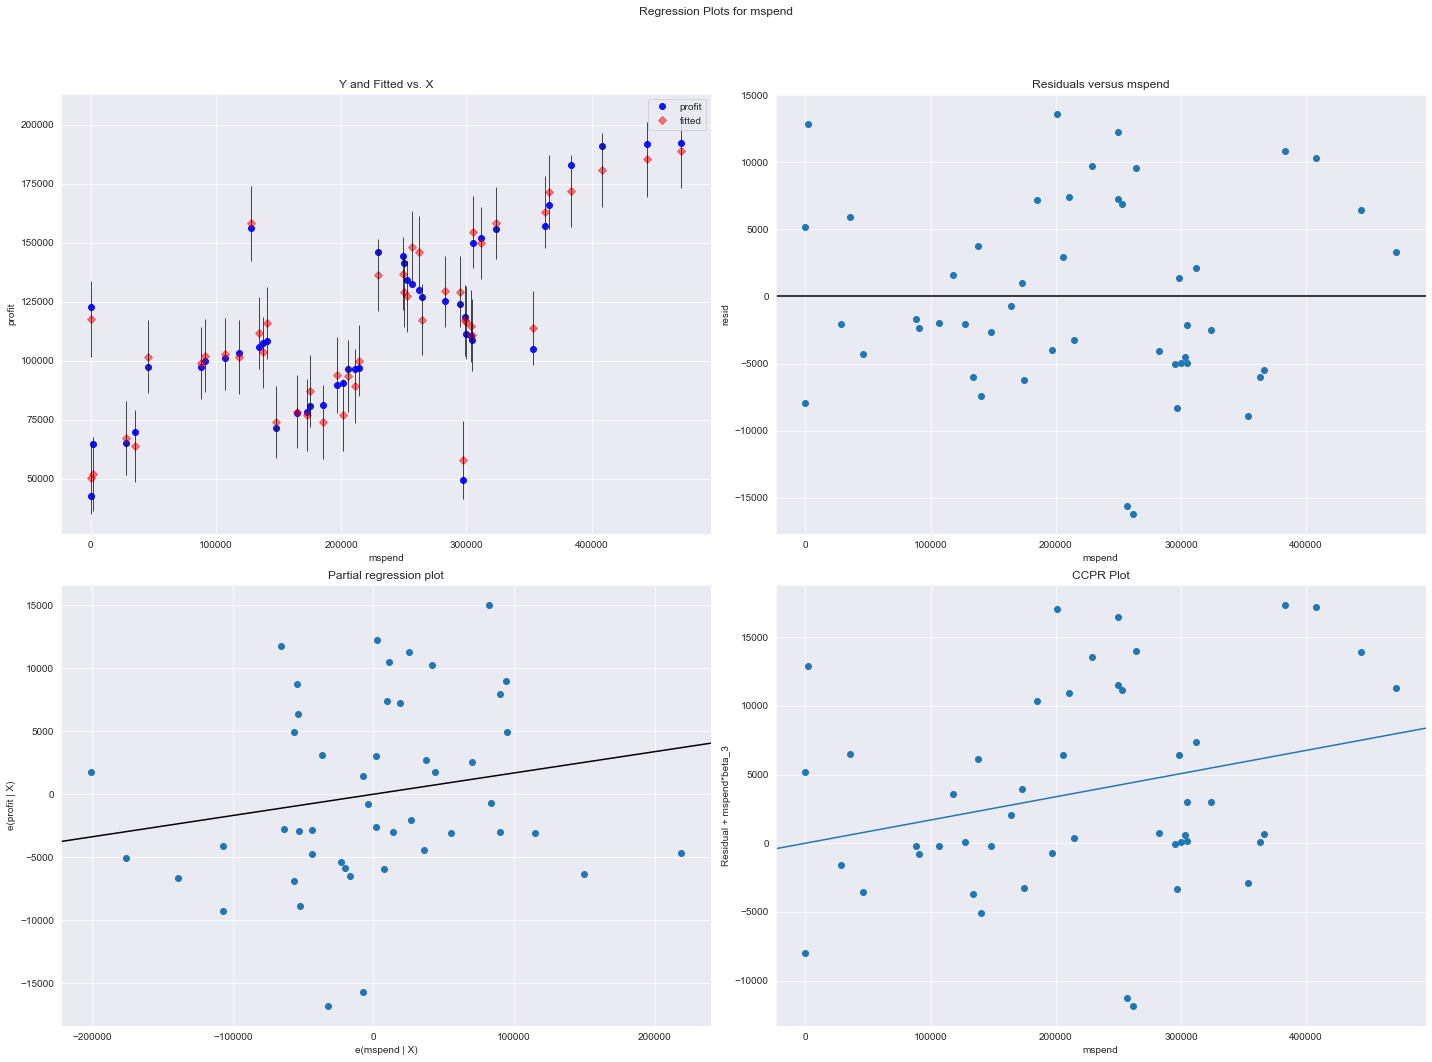

In [95]:
fig=plt.figure(figsize=[20,15])
sm.graphics.plot_regress_exog(model2,'mspend',fig=fig)
plt.show()

# NEW DATA PREDICTION

In [96]:
new_data=pd.DataFrame({'rds':70000,"admin":90000,"mspend":140000},index=[0])
new_data

,rds,admin,mspend
0,70000,90000,140000


In [97]:
pd.DataFrame({"prediction ": model2.predict(new_data)})

,prediction
0,111027.02823


In [98]:
pd.DataFrame(model2.predict())

,0
0,188939.277484
1,185378.579127
2,180724.354190
3,172036.176973
4,171688.341312
5,163022.000480
6,158209.614122
7,158220.907984
8,150109.699290
9,154738.693091


# rsquared of initial model and final model 

In [99]:
d1={"SLR MODELS":["slr_rds","slr_admin","slr_mspend"],"Rsquared":[slr_1.rsquared,slr_2.rsquared,slr_3.rsquared]}
pd.DataFrame(d1)
# simple linear regression of x. variables with y

,SLR MODELS,Rsquared
0,slr_rds,0.946535
1,slr_admin,0.040287
2,slr_mspend,0.950450


In [100]:
#rsquared of multi linear regression models 
d2={'Prep_Models':['Model1','Model2'],'Rsquared':[model1.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model1,0.950746
1,Model2,0.962677
